In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Angle Model Power

For the Angle Model

In [14]:
angle_power_data = pd.read_csv("angle_test/model_py/power_meas_usb/power_measurements.csv")

angle_power_data.head(5)

,time [s],power_tpu_idle [W],power_vpu_idle [W],power_tpu_inference [W],power_vpu_inference [W]
0,0,0.369,0.64,1.240,1.598
1,1,0.370,0.64,1.242,1.598
2,2,0.370,0.64,1.243,1.598
3,3,0.370,0.64,1.241,1.599
4,4,0.370,0.64,1.237,1.600


### PID Model Power

For the PID Model

In [15]:
pid_power_data = pd.read_csv("pid_test/model_py/power_meas_usb/power_measurements.csv")

pid_power_data.head(5)

,time [s],power_tpu_idle [W],power_vpu_idle [W],power_tpu_inference [W],power_vpu_inference [W]
0,0,0.369,0.64,1.225,1.805
1,1,0.370,0.64,1.257,1.830
2,2,0.370,0.64,1.222,1.830
3,3,0.370,0.64,1.257,1.836
4,4,0.370,0.64,1.257,1.836


### The Comparison of Power Consumption

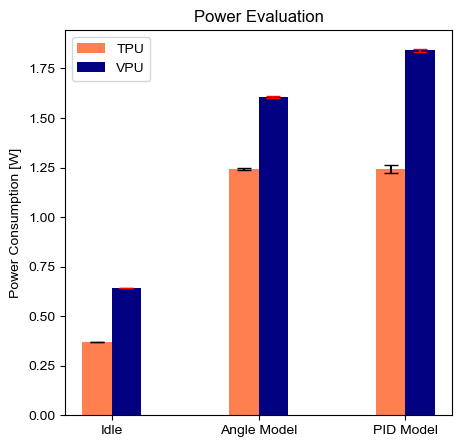

In [22]:
plt.rcParams.update({'font.sans-serif':'Arial'})

fig, ax = plt.subplots(1,1, figsize=(5,5))

xlabels = ['Idle', 'Angle Model', 'PID Model']

yvalues_tpu = [angle_power_data['power_tpu_idle [W]'].mean(), angle_power_data['power_tpu_inference [W]'].mean(), pid_power_data['power_tpu_inference [W]'].mean()]
yerr_tpu = [angle_power_data['power_tpu_idle [W]'].std(), angle_power_data['power_tpu_inference [W]'].std(), pid_power_data['power_tpu_inference [W]'].std()]

yvalues_vpu = [angle_power_data['power_vpu_idle [W]'].mean(), angle_power_data['power_vpu_inference [W]'].mean(), pid_power_data['power_vpu_inference [W]'].mean()]
yerr_vpu = [angle_power_data['power_vpu_idle [W]'].std(), angle_power_data['power_vpu_inference [W]'].std(), pid_power_data['power_vpu_inference [W]'].std()]

ax.bar(np.arange(len(xlabels)) - 0.1, yvalues_tpu, yerr=yerr_tpu, width=0.2, label='TPU', color='coral', capsize=5)
ax.bar(np.arange(len(xlabels)) + 0.1, yvalues_vpu, yerr=yerr_vpu, width=0.2, label='VPU', color='navy', capsize=5, ecolor='red')

ax.set_title('Power Evaluation')
ax.set_ylabel('Power Consumption [W]')
ax.set_xticks(range(len(xlabels)), xlabels)
ax.legend()

fig.savefig("graphs/power_evaluation.pdf")